# **Final Test**

  * You can use Colab or your local installation
  * Rename the notebook with your Surname
  * SEND THE .ipynb file to `marco.milanesio@univ-cotedazur.fr` 
  * **DEADLINE** 12-01-2021 at 23h59.

## Usual preamble to a `Spark` notebook on google.colab...

In [126]:
# !apt-get install openjdk-8-jdk-headless -qq > /dev/null
# import os
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# !update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
# !java -version
# !pip install pyspark

Let's load the data.


In [127]:
# from google.colab import files
# files.upload()  # upload 'boston.csv'

In [128]:
# !ls

You should have now `boston.csv` in your folder.

## ... or continue from here if you run locally on your machine

## Housing prices in Boston

The goal is to predict the housing prices in the Boston area.

The data is as follows:
  * `crim` — per capita crime rate by town.
  * `zn` — proportion of residential land zoned for lots over 25,000 sq.ft.
  * `indus` — proportion of non-retail business acres per town.
  * `chas` — Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
  * `nox` — nitrogen oxides concentration (parts per 10 million).
  * `rm` — average number of rooms per dwelling.
  * `age` — proportion of owner-occupied units built prior to 1940.
  * `dis` — weighted mean of distances to five Boston employment centres.
  * `rad` — index of accessibility to radial highways.
  * `tax` — full-value property-tax rate per $10,000.
  * `ptratio` — pupil-teacher ratio by town.
  * `black` — 1000(Bk — 0.63)<sup>2</sup> where Bk is the proportion of blacks by town.
  * `lstat` — lower status of the population (percent).
  * `medv` — median value of owner-occupied homes in \$1000s. **This is the target variable.**

In [129]:
#importing packages to create spark session and handeling them.

from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType

## 0 - Create a spark session named 'houses'

In [130]:
# creating spark session. master("local[*]") can be used to create loacl system as master but it is time taking.

spark = SparkSession.builder.appName('houses').getOrCreate()      

## 1 - Load the `boston.csv` file into the session
Use proper values for `inferSchema` and `header`, depending on the file itself...

**CALL IT `bostondf`** Otherwise some code may not work later

In [131]:
#Loading the csv file with keeping the haeder and schema.

bostondf = spark.read.format("csv").options(header=True, inferSchema=True).load("boston.csv") 

## 2 - Print the dataframe schema

In [132]:
#data frame schema

bostondf.printSchema()       

root
 |-- _c0: integer (nullable = true)
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- black: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



## 3 - Show the first 3 rows of the dataframe

In [133]:
# Data frame firat 3 rows

bostondf.show(3)          

+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|_c0|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio| black|lstat|medv|
+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|  1|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|  2|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|  3|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 3 rows



In [134]:
type(bostondf)

pyspark.sql.dataframe.DataFrame

## 4 - Output basic stats on the dataset.

*hint*: for readability purposes you can `transpose` a description dataframe.


In [135]:
# import pandas and transpose the description of data frame with column names.

import pandas as pd                                                          
bostondf.toPandas().describe().transpose()      

,count,mean,std,min,25%,50%,75%,max
_c0,506.0,253.500000,146.213884,1.00000,127.250000,253.50000,379.750000,506.0000
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


In [136]:
# Dropped _C0 column (just row number) as main data frame is mentioned under the heading "Housing prices in Boston". 

bostondf = bostondf.drop("_c0")                     

In [137]:
bostondf.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio| black|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

## 5 - Scatter Matrix (use pandas)

Scatter matrix is a great way to roughly determine if we have a linear correlation between multiple independent variables. `pandas` does it for us.


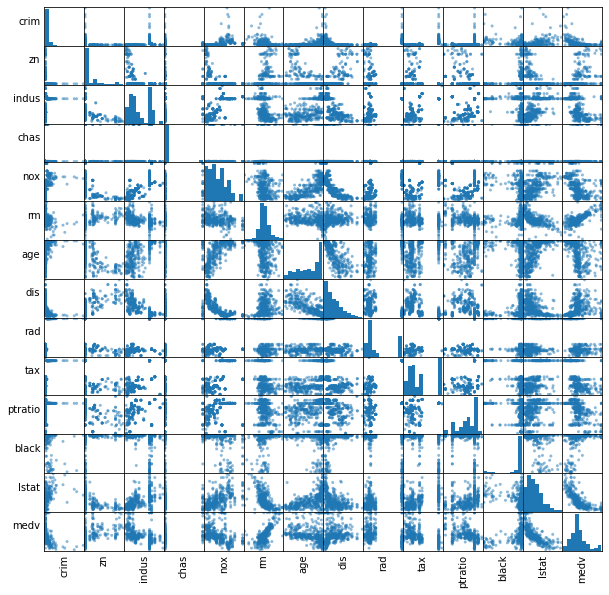

In [138]:
# DON"T CHANGE THIS. JUST RUN IT
import pandas as pd

numeric_features = [t[0] for t in bostondf.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = bostondf.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)

for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

## 6 - Comment on the scatterplot

Add your considerations here.

=>Scatter plot matrix is Assess whether the data is linearly separable or not.

Comparing all feature with others and target variable which is "medv":
-----------------------------------------------------------------------------------------------------
<ol>
<li>crim(per capita crime rate by town) don’t have any strong relation with other feature but moderate positive with age and Istat. That means the impact of value changes in age and istat will impact the crim moderately.
 crim is negative direction with respect to dis feature. whereas other or unpredictable with respect to this much of data set.
 with respect to target variable medv, crim is moderate negative.<br>
 crim - moderate negative - medv<br></li>
 
<li>zn (proportion of residential land zoned) is moderate negative with age and istat. it concludes that on increase of zn(area)
    aged population is low. there is not much linear relation with other variables. with respect to medv not much relation.<br>
    Zn - no linear relation - medv<br></li>
<li>indus(non-retail business acres) is positive relation with istat and negative relation with medv, dis. that means other factors are not that much influencing as much as mentioned features.<br>
  indus - negative relation - medv<br></li>
 
<li>chas(Charles River dummy variable) is completely not impacted by other features and not getting changed by other variables.<br>
 chas - no relation - medv<br></li>
<li>nox(nitrogen oxides concentration) is strong positive relation with indus, age, istat and ptratio. this may states that where aged people are there nox connections are strongly there. nox is strongly negative with dis, medv. on rise of nox, medv is lowering.<br>
nox - negative relation - medv<br></li>
 
<li>rm(average number of rooms) is mostly not changing with respect other parameters but negative with istat and positive with medv.
rm - positive linear relation - medv</li>
<li>age (proportion of owner), on increase of age crim feature also showing positive linear relation. not only crim but also indus, nox, ptratio and istat. strongly negative direction with zn and strong negative with dis.
age - not much relation - medv</li>
<li>dis (weighted mean of distances) is negative with nox,age,ptratio,istat. positive with black and medv.
dis - positive - medv</li>
<li>rad (index of accessibility to radial highways) is almost constant value with respect to all other features.
rad - no relation - medv</li>
<li>tax (property-tax rate) is also not that much changing with other features but on clear observation it is towards negative wit medv.
tax - weak negative - medv</li>
<li>ptratio(pupil-teacher ratio)is positive with istat and negative with medv. 
ptratio - weak negative - medv.</li>
<li>black(proportion of blacks by town) is not that much impacting by other features. where as on deep observation week positive with medv.
black - weak positive - medv</li>
<li>istat (lower status of the population) is positive with crim,indus,nox and rm where as negative with medv.
istat - negative - medv.</li>
</ol>
medv(median value of owner-occupied homes): as mentioned above medv as follows: <br>
crim  - moderate negative   - medv<br>
Zn    - no relation  - medv<br>
indus - negative relation   - medv<br>
chas  - no relation         - medv<br>
nox   - negative relation    - medv<br>
rm    - positive  relation - medv<br>
age   - no relation      - medv<br>
dis   - positive            - medv<br>
rad   - no relation         - medv<br>
tax   - weak negative      - medv<br>
ptratio - weak negative     - medv.<br>
black - weak positive       - medv<br>
istat - negative            - medv.<br>


## 7 - Compute all correlations with the target variable (`medv`)

*hint*: look at the `stat` attribute of the dataframe

In [139]:
# Stat.corr used to find correlation with medv variable.
# Correlation with medv itself is 1. we can remove by adding 
# bostondf.columns[0:-1]

input_columns = bostondf.columns     

correlations = {column:bostondf.stat.corr("medv", column) for column in input_columns}

print("Correlation with 'medv':") 
correlations                                #printing the correlation.



Correlation with 'medv':


{'crim': -0.38830460858681154,
 'zn': 0.3604453424505433,
 'indus': -0.4837251600283728,
 'chas': 0.1752601771902987,
 'nox': -0.4273207723732821,
 'rm': 0.6953599470715401,
 'age': -0.3769545650045961,
 'dis': 0.249928734085904,
 'rad': -0.38162623063977735,
 'tax': -0.46853593356776674,
 'ptratio': -0.5077866855375622,
 'black': 0.3334608196570661,
 'lstat': -0.7376627261740145,
 'medv': 1.0}

## 8 - Data preparation

We keep all the variables, for now. **WHY?**

To prepare the data we need features and labels.
Being that data is numerical, we do not have to perform any encoding. Just build the `Vector`.

In [140]:
# All variables are in numaric so need not to transform or remove.
# Import packages to transform to vector.
# Discarded the target variable medv in the list.


from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

input_columns = bostondf.columns[0:-1] 

features = VectorAssembler(inputCols=input_columns, outputCol='features')

stages=[]
stages=[features]
pipeline = Pipeline(stages=stages)

v_df = pipeline.fit(bostondf).transform(bostondf).select(["features", "medv"])
v_df.show(3)

+--------------------+----+
|            features|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
+--------------------+----+
only showing top 3 rows



Let's split the dataset into training and testing sets with a 70:30 ratio

In [141]:
# DONT CHANGE THIS, Just RUN IT.
splits = v_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

## 9 - Linear regression

See the [docs](https://spark.apache.org/docs/3.0.0/api/python/pyspark.ml.html#module-pyspark.ml.regression).

Build a linear regression model to fit the data.
  * feature column: `features`
  * label column: `medv`
  * maxIter: 10
  * regParam: 0.3
  * elasticNetParam: 0.8  <- optional

Fit the model and print `coefficients` and `intercept`

In [142]:
# Building LinearRegression model and imported the package.
# Passed parameters to model as mentioned above.
# Trained the model with training dataset.

from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features',labelCol = 'medv', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)

In [143]:
# Coefficients of each variable.
# lr_model.coefficients is a dense vector.

print("Coefficients of the lr_model:")
str(lr_model.coefficients)

Coefficients of the lr_model:


'[0.0,0.008713486467990224,0.0,3.1965273396193203,-4.762107001555145,3.757126936708739,0.0,-0.5854031042960425,0.01212117283252987,0.0,-0.7606161619461473,0.007091760388424669,-0.5677468637086738]'

In [144]:
# intercept

print("intercept of the lr_model:")
lr_model.intercept

intercept of the lr_model:


22.132744604524913

## 10 - Summary and RMSE

Print the summary of the model, the `RMSE` and the `r2` errors

In [145]:
lr_model_Summary = lr_model.summary

In [146]:
print(f" The value of RMSE: {lr_model_Summary.rootMeanSquaredError}")
print(f"The value of  r2: {lr_model_Summary.r2}")

 The value of RMSE: 5.0718518851665
The value of  r2: 0.6913859327816925


In [147]:
# Total summary of the model including the parametrs and history.
# Total iterations are showing as 11 because 0-10 total iterations which is 11.
print(f"Number of iterations: {lr_model_Summary.totalIterations}") 
print(f"object History: {lr_model_Summary.objectiveHistory}")
print("Parameters of the model: featuresCol = 'features',labelCol = 'medv', maxIter=10, regParam=0.3, elasticNetParam=0.8")

Number of iterations: 11
object History: [0.49999999999999956, 0.43577522090336135, 0.2514743306063565, 0.22702029013851102, 0.19731227472776552, 0.19359980917546996, 0.19253438786361415, 0.1908398927087941, 0.19002207950398634, 0.18965229594414226, 0.1895207032463865]
Parameters of the model: featuresCol = 'features',labelCol = 'medv', maxIter=10, regParam=0.3, elasticNetParam=0.8


RMSE measures the differences between predicted values by the model and the actual values. However, RMSE alone is meaningless until we compare with the actual `medv` value, such as mean, min and max.

<h5> The goal is to have RMSE as close possible to zero. The closer the value of RMSE is to zero , the better is the Regression Model.In reality , we will not have RMSE equal to zero , in that case we will be checking how close the RMSE is to zero.  

Considering the range of the target variable which is 5-50. having the rmse value 5.07 is considerable this is not a very GOOD model.
    
A low r-squared figure is generally a bad sign for predictive models. Considering the 0.69 r2 score which is nearer to 1 so considerablly this is not a very GOOD model.
    
Inorder to compare with other models, the following code will fit the data with other model to compare.
</h5>

What can you infer from this results? Is it good or is it bad?


## 11 - Predictions

Make preditions and evaluate the model (e.g., with `RMSE`). We will use a `RegressionEvaluator` for this.

In [148]:
# Predicting the values by using the model.
# Printing the top 5 results.

lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","medv","features").show(5)

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 30.24828594927377|29.1|[0.01439,60.0,2.9...|
| 34.25384431101195|44.0|[0.01538,90.0,3.7...|
|25.920899922669467|23.1|[0.0187,85.0,4.15...|
| 25.92862179821145|24.7|[0.02055,85.0,0.7...|
| 28.83464020007343|30.8|[0.02763,75.0,2.9...|
+------------------+----+--------------------+
only showing top 5 rows



In [149]:
# DON'T TOUCH THIS. JUST RUN
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="medv", metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = 0.748782


In [150]:
# Test data evaluation to chaeck rootMeanSquaredError.

test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)


Root Mean Squared Error (RMSE) on test data = 4.66719


In [151]:
# Assigning model summary to trainingSummary

trainingSummary = lr_model.summary

In [152]:
# Summary, History and Residuals from trainingSummary.

print("Toatla number of Iterations:")
print(trainingSummary.totalIterations)
print("----------------------------\n")

print("objectiveHistory:")
print(trainingSummary.objectiveHistory)
print("----------------------------\n")

print("Residuals:")
trainingSummary.residuals.show()

Toatla number of Iterations:
11
----------------------------

objectiveHistory:
[0.49999999999999956, 0.43577522090336135, 0.2514743306063565, 0.22702029013851102, 0.19731227472776552, 0.19359980917546996, 0.19253438786361415, 0.1908398927087941, 0.19002207950398634, 0.18965229594414226, 0.1895207032463865]
----------------------------

Residuals:
+-------------------+
|          residuals|
+-------------------+
|-6.3984189183542455|
|  2.117944115146585|
| -5.227947622471522|
| 1.3767451461665665|
|  5.735219366125133|
| 1.8297908634768518|
| 12.693813428397092|
| 0.6988649246135452|
|-2.7918997299853423|
|   8.79490538072389|
| 3.6546777747402786|
|  2.227047988464129|
|  7.297462129276898|
|-0.2329526728386142|
| 11.830319019692219|
|  6.621976401795898|
|0.36613298686691564|
| -9.841737337360474|
|-3.6213180362259862|
| 3.7303712626384957|
+-------------------+
only showing top 20 rows



We can use the model to make some predictions on the testing set.

In [153]:
# Predictions on testing data set and printing.

predictions = lr_model.transform(test_df)
predictions.select("prediction", "medv", "features").show()


+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 30.24828594927377|29.1|[0.01439,60.0,2.9...|
| 34.25384431101195|44.0|[0.01538,90.0,3.7...|
|25.920899922669467|23.1|[0.0187,85.0,4.15...|
| 25.92862179821145|24.7|[0.02055,85.0,0.7...|
| 28.83464020007343|30.8|[0.02763,75.0,2.9...|
|26.846830655789894|25.0|[0.02875,28.0,15....|
|26.211079836454754|28.7|[0.02985,0.0,2.18...|
| 20.04213479104057|18.5|[0.03041,0.0,5.19...|
| 29.15659055404251|31.2|[0.03049,55.0,3.7...|
|  20.4253400658669|17.5|[0.03113,0.0,4.39...|
|31.774904399395894|34.9|[0.03359,75.0,2.9...|
| 27.77361960840301|24.1|[0.03445,82.5,2.0...|
|36.977451047180615|48.5|[0.0351,95.0,2.68...|
| 27.16351606879261|22.0|[0.03537,34.0,6.0...|
|23.232362618640085|20.7|[0.03738,0.0,5.19...|
|25.913544703709075|23.2|[0.03871,52.5,5.3...|
|26.679060053067168|22.0|[0.03932,0.0,3.41...|
|21.821448328201313|21.1|[0.03961,0.0,5.19...|
|30.199795289

## 12 - Decision tree regression and Gradient-boosted tree regression

Try to do the same thing with these 2 regressors.
Which will result better? 

See the [docs](https://spark.apache.org/docs/3.0.0/api/python/pyspark.ml.html#pyspark.ml.regression.DecisionTreeRegressor).

In [154]:
# Decision tree regression model creation and fitting.
# Making prediction with traing data set and regression evaluation.
# Printing Root Mean Squared Error.

from pyspark.ml.regression import DecisionTreeRegressor

dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'medv')

dt_model = dt.fit(train_df)

dt_predictions = dt_model.transform(test_df)

dt_evaluator = RegressionEvaluator(labelCol="medv", predictionCol="prediction", metricName="rmse")

rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 4.74119


### Gradient-boosted tree regression

See the [docs](https://spark.apache.org/docs/3.0.0/api/python/pyspark.ml.html#pyspark.ml.regression.GBTRegressor).

In [155]:
# GBTRegression model creation and fitting.
# Predicting with training data set.
# Printing prediction and features.

from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'medv', maxIter=10)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)

gbt_predictions.select('prediction', 'medv', 'features').show(5)


+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
|29.262241263884682|29.1|[0.01439,60.0,2.9...|
| 43.22587762752106|44.0|[0.01538,90.0,3.7...|
|22.573219334657153|23.1|[0.0187,85.0,4.15...|
|23.321066654955803|24.7|[0.02055,85.0,0.7...|
|27.399604491897897|30.8|[0.02763,75.0,2.9...|
+------------------+----+--------------------+
only showing top 5 rows



In [156]:
# Regression evalution and printing Root Mean Squared Error.

gbt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 4.49322


# Conclusion:

After applying the multiple models and comparing their individual rmse and r2 scores, comparitively Gradient-boosted tree regression and Decision tree regression are giving the better results with compared to linear regression.

By comparing three models, Gradient-boosted tree regression is having the least rmse score which implies that, some what it is the best model amoung all which fits better.